In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           5.08e-88
Time:                        22:46:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

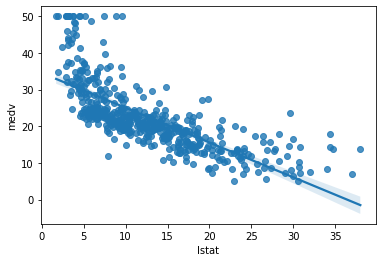

In [6]:
# You will need to change this for your environment
DATA_ROOT = 'Data/'
df = pd.read_csv(DATA_ROOT + 'Boston.csv', index_col=0)
df.head()

# We will use the Boston house data from the text book in part of this lab. Here is a regression
# of median house price against proportion of residents in a neighborhood in a lower economic demographic.
lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()

print(result.summary())

sns.regplot('lstat', 'medv', df)
plt.show()

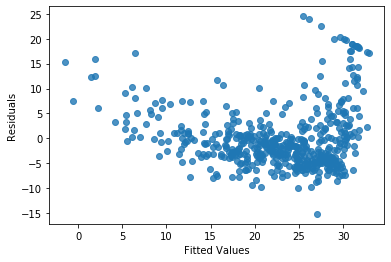

In [7]:
# Plot residuals against fitted values
# You can get the fitted values and the residuals as properties of the regression, among other properties

fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)
plt.show()

# Multiple Linear Regression

In [8]:

# Add one other feature to compare the regression fit
m1 = sm.OLS.from_formula('medv ~ lstat + age', df)
r1 = m1.fit()
print(r1.summary())

# We can use an ANOVA to test the null hypothesis that the regression using the squared term
# does not improve the fit. For example, this ANOVA shows an F score of 135
# and a p-value of virtually zero, indicating an improved fit
print(sm.stats.anova_lm(result, r1))

# The anova table shows F statistics and p-values for the null hypotheses that the
# model with age as well as lstat fits the data as well as the first model, which
# can be rejected with a p-value of 0.005



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           2.98e-88
Time:                        22:46:54   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [9]:
# Add all the other features:
# This syntax lets us easily reference all the other columns save
m2 = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
r2 = m2.fit()
print(r2.summary())

print(sm.stats.anova_lm(r1, r2))

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 03 Feb 2022   Prob (F-statistic):          2.23e-133
Time:                        22:46:54   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Questions 1-3

Question 1: can we reject the null hypothesis that the model for median value (medv)
with all the fields fits the data no better than the model with only lstat and age? Why?

Question 2: from the result of the second regression, which predictor variables would you
drop from the regression? You can drop variables by adding them to the list in the
difference call, e.g. to drop crime, use 'df.columns.difference(['medv', 'crim'])'
(Although this is not to imply that crime should be dropped from the regression):



Q1: Yes, we can reject the null hypothesis, since the R-squared value for the model containing all the fields is significantly higher than the R-squared for the model with just lstat and age. Additionally, when examining the F-values and probabilities from the ANOVA analysis, we can see that the F-value is high and the probability in low in the second ANOVA, indicating that the second model fits the data better.

Q2: I think that we can drop age and indus, since their P values are extremely high, suggesting that they have little bearing on the efficacy of our model.

In [10]:
print(sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'age', 'indus'])), df).fit().summary())

# Insert your own model here or edit above

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Thu, 03 Feb 2022   Prob (F-statistic):          1.73e-135
Time:                        22:46:55   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.0

Question 3: After you drop these variables, what is the R-squared and how does it compare to the
full R-squared and that of the model with lstat and age?


Q3: The R-squared for the model with age and indus removed is 0.734, compared to the full R-squared of 0.734 and the R-squared  value of 0.551 for the lstat and age model.

# Interaction terms


In [11]:
# You can include interaction terms in the regression formula with a '*'. For example,
# this regression includes lstat * age, and automatically includes both lstat and age.
print(sm.OLS.from_formula('medv ~ lstat*age', df).fit().summary())



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           4.86e-88
Time:                        22:46:55   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

# Question 4

Question 4: Based on the regression graph of medv regressed onto lstat in the second cell, above, would
you expect that including a squared term for lstat might be useful for the model? Why?


In [12]:
Q4: Yes, it appears that including a squared term might be useful for the model, since the data appears to be nonlinear.

SyntaxError: invalid syntax (<ipython-input-12-b637367b47ca>, line 1)

In [13]:
# You can also include functions of predictor variables. For example, this version
# includes a squared term for lstat
lm.fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', df).fit()
print(lm.fit2.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 03 Feb 2022   Prob (F-statistic):          1.56e-112
Time:                        22:46:56   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

In [14]:
print(sm.stats.anova_lm(result, lm.fit2))


   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\wwxia\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Qualitative variables


In [15]:
# We turn now to a new data set from the text book, on number of car seats sold,
# which includes three qualitative variables.
# Recall you may need to modify this line to load the data on your setup:

df2 = pd.read_csv(DATA_ROOT + 'Carseats.csv')
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [16]:
# The regression defined with the from_formula call automatically converts the
# three categorical variables to dummy variables.

print(sm.OLS.from_formula('Sales ~  ' + "+".join(df2.columns.difference(['Sales'])), df2).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 03 Feb 2022   Prob (F-statistic):          1.60e-166
Time:                        22:46:59   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

# Question 5

Question 5: Why are there two variables for Shelving location included in the
regression? Which variables would you consider dropping from this regression?


Q5: The regression takes into account the values inputted for the data in the shelving column. Since the shelving column is a categorical variable, the regression creates dummy variables. Since there are three potential values for the shelving category, one of them must be dropped due to issues with collinearity. Thus, the regression output displays two of the dummy variables, Good and Medium while dropping Bad.

In this regression, I would look into dropping US[T.Yes], Urban[T.Yes], Education, and Population.

In [ ]:
# You can show the result of dropping the variables you suggest here (not scored)
